# **YOLOv5 Object Detection Notebook**

**Import Necessary Libraries**

In [ ]:
!pip install opencv-python
!pip install torch torchvision  
!pip install tensorflow  

In [1]:
import logging
import os
import sys
# Ensure logs folder exists
os.makedirs("../logs", exist_ok=True)

# Configure logging to write to file & display in Jupyter Notebook
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("../logs/yolo_image_detection.log", encoding='utf-8'),  
        logging.StreamHandler(sys.stdout)  
    ]
)
logging.info("✅ Logging setup complete.")

2025-02-05 01:23:21,472 - INFO - ✅ Logging setup complete.


In [2]:
# Import libraries for file handling and data splitting
import os
import sys
import random
import shutil
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
sys.path.append('../yolov5')  # Adjust the path based on your directory structure

**Define Paths and Prepare Directories**

We define the paths for the source images and create directories for the training and validation sets.

In [3]:
# Define the directory paths
image_dir = '../data/images'  # Directory containing all your images
train_dir = '../data/train/images'  # Directory for training images
val_dir = '../data/valid/images'  # Directory for validation images


try:
    # Create directories for train and validation sets if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Print the number of images available
    print(f"Total images available: {len(os.listdir(image_dir))}")
    logging.info(f'{len(os.listdir(image_dir))} total images available in {image_dir}')
except Exception as e:
    logging.info(f'Error: {e}')


Total images available: 236
2025-02-05 01:23:28,169 - INFO - 236 total images available in ../data/images


**Split the Dataset**

Split the images into training and validation datasets with a specified ratio (default is 80% training, 20% validation).

In [4]:
def split_dataset(source_dir, train_dir, val_dir, split_ratio=0.8):
    # List all images in the source directory
    images = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]
    random.shuffle(images)  # Shuffle the images for random selection

    # Calculate the split index
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    val_images = images[split_index:]

    # Copy images to the respective directories
    for image in train_images:
        shutil.copy(os.path.join(source_dir, image), train_dir)
    for image in val_images:
        shutil.copy(os.path.join(source_dir, image), val_dir)
    
    print(f"Training images: {len(train_images)}")
    print(f"Validation images: {len(val_images)}")


if __name__=='__main__':
    
    try:
        # Call the function to split the dataset
        split_dataset(image_dir, train_dir, val_dir)
        logging.info(f"✅ Splited the dataset into train and validation sets.")
    except Exception as e:
        logging.info(f'💥 Error: {e}')


Training images: 188
Validation images: 48
2025-02-05 01:23:33,342 - INFO - ✅ Splited the dataset into train and validation sets.


**Create the Data YAML File**

The YAML file will define paths to training and validation data, the number of classes, and their names.

In [5]:
# Define the content of the YAML file
yaml_content = """
train: D:/KAIM/Ethiopian-Medical-Business-Data-Warehouse/data/train/images  # Specify the correct path to training images
val: D:/KAIM/Ethiopian-Medical-Business-Data-Warehouse/data/valid/images    # Specify the correct path to validation images

nc: 9  # Number of classes
names: [
  'cosmotic',
  'food-package', 
  'supliment', 
  'formula-milk', 
  'lotion-moisturizer', 
  'medicine', 
  'mini-drop', 
  'pregnancy', 
  'other'
]
"""

In [3]:
import os
# Write the content to a file
with open("Ethiopian_Medical_DataWarehouse.yml", "w") as file:
    file.write(yaml_content)

# Verify the file was created
print(os.path.exists("Ethiopian_Medical_DataWarehouse.yml"))  # Should return True

# Check the existence of the image directory
print(os.path.exists('D:/KAIM/Ethiopian-Medical-Business-Data-Warehouse/data/train/images'))  # Should return True

True
True


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="eDraTy7oHELDj6QbeQ2L")
project = rf.workspace("medical-products").project("medical-products")
version = project.version(1)
dataset = version.download("yolov8") 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to medical-products-1 in yolov8:: 100%|██████████| 392/392 [00:00<00:00, 2149.15it/s]


In [7]:
# Base training command (yolov8s)
from ultralytics import YOLO

# Load model
model = YOLO("yolov8s.pt") 

100%|██████████| 21.5M/21.5M [01:23<00:00, 270kB/s]


In [8]:
# Train with parameters
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=5,
    imgsz=640,
    batch=16,
    name="fine_tuned_model",
    project="medical-detection"
)

New https://pypi.org/project/ultralytics/8.3.71 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=medical-detection, name=fine_tuned_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

train: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\train\labels... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 285.18it/s]

train: New cache created: D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 177. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\valid\labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 355.89it/s]

val: New cache created: D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\valid\labels.cache


Plotting labels to medical-detection\fine_tuned_model\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to medical-detection\fine_tuned_model
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.606      6.813      1.876         10        640: 100%|██████████| 9/9 [01:43<00:00, 11.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]

                   all         38         55      0.261      0.101     0.0909     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.17      3.569       1.58         12        640: 100%|██████████| 9/9 [01:07<00:00,  7.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.33s/it]

WARNING  NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.56s/it]

                   all         38         55      0.772     0.0833     0.0608     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9594       2.81      1.395         16        640: 100%|██████████| 9/9 [02:23<00:00, 15.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.46s/it]

                   all         38         55      0.628      0.292      0.241      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      0.911       2.41      1.332         16        640: 100%|██████████| 9/9 [02:07<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]

                   all         38         55       0.46      0.347      0.211      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.8497      2.303      1.263         13        640: 100%|██████████| 9/9 [02:21<00:00, 15.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.49s/it]

                   all         38         55      0.117      0.282      0.129     0.0975



5 epochs completed in 0.189 hours.
Optimizer stripped from medical-detection\fine_tuned_model\weights\last.pt, 22.5MB
Optimizer stripped from medical-detection\fine_tuned_model\weights\best.pt, 22.5MB

Validating medical-detection\fine_tuned_model\weights\best.pt...
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.13s/it]


                   all         38         55      0.619      0.173       0.15     0.0935
              cosmotic          4          6     0.0636      0.167     0.0508      0.032
          food-package          3          3          1          0     0.0743     0.0371
        food-supliment         16         24      0.354      0.167      0.187      0.115
          formula-milk          8          8      0.614      0.375      0.286        0.2
       lotion-moisture          4          4      0.304        0.5      0.374      0.241
              medicine          6          7          1          0     0.0801     0.0293
             mini-drop          2          3          1          0          0          0
Speed: 4.0ms preprocess, 355.0ms inference, 0.0ms loss, 157.7ms postprocess per image
Results saved to medical-detection\fine_tuned_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D777938140>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [10]:
# Training with different model sizes
models = {
    "yolov8n": (320, 8),  
    "yolov8s": (640, 16),  
    "yolov8m": (640, 16)   
}
for model_name, (imgsz, batch) in models.items():
    model = YOLO(f"{model_name}.pt")
    model.train(
        data=f"{dataset.location}/data.yaml",
        epochs=5,
        imgsz=imgsz,
        batch=batch,
        name=f"fine_tuned_{model_name}",
        project="medical-detection"
    )

100%|██████████| 6.25M/6.25M [00:30<00:00, 216kB/s]


New https://pypi.org/project/ultralytics/8.3.71 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=medical-detection, name=fine_tuned_yolov8n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

train: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\train\labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 177. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to medical-detection\fine_tuned_yolov8n\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to medical-detection\fine_tuned_yolov8n
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.396      3.612       1.45         10        320: 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         38         55    0.00562      0.935      0.189      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.055      3.339      1.222         18        320: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         38         55    0.00569      0.893      0.188      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.002      3.064      1.213         16        320: 100%|██████████| 17/17 [00:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         38         55     0.0633      0.792      0.199      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.9445      2.944      1.169         16        320: 100%|██████████| 17/17 [00:17<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         38         55       0.83      0.143      0.213      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.9238       2.91      1.179         12        320: 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         38         55      0.816      0.202      0.213      0.169



5 epochs completed in 0.019 hours.
Optimizer stripped from medical-detection\fine_tuned_yolov8n\weights\last.pt, 6.2MB
Optimizer stripped from medical-detection\fine_tuned_yolov8n\weights\best.pt, 6.2MB

Validating medical-detection\fine_tuned_yolov8n\weights\best.pt...
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         38         55      0.816      0.202      0.211      0.168
              cosmotic          4          6          1          0      0.213      0.144
          food-package          3          3          1          0     0.0525     0.0446
        food-supliment         16         24      0.454      0.542      0.377      0.269
          formula-milk          8          8      0.258      0.875      0.549      0.489
       lotion-moisture          4          4          1          0     0.0885     0.0651
              medicine          6          7          1          0      0.155      0.121
             mini-drop          2          3          1          0     0.0446     0.0406
Speed: 0.3ms preprocess, 18.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to medical-detection\fine_tuned_yolov8n
New https://pypi.org/project/ultralytics/8.3.71 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu C

train: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\train\labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 177. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to medical-detection\fine_tuned_yolov8s\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to medical-detection\fine_tuned_yolov8s
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.606      6.813      1.876         10        640: 100%|██████████| 9/9 [02:16<00:00, 15.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:17<00:17, 17.02s/it]

WARNING  NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.01s/it]

                   all         38         55       0.39     0.0655     0.0354     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.17      3.569       1.58         12        640: 100%|██████████| 9/9 [01:50<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]

                   all         38         55      0.581      0.182      0.119     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9594       2.81      1.395         16        640: 100%|██████████| 9/9 [01:08<00:00,  7.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.61s/it]

                   all         38         55      0.628      0.292      0.241      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      0.911       2.41      1.332         16        640: 100%|██████████| 9/9 [01:07<00:00,  7.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.53s/it]

                   all         38         55      0.304      0.354      0.226       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.8497      2.303      1.263         13        640: 100%|██████████| 9/9 [01:27<00:00,  9.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.33s/it]

                   all         38         55      0.116      0.276      0.125     0.0934



5 epochs completed in 0.156 hours.
Optimizer stripped from medical-detection\fine_tuned_yolov8s\weights\last.pt, 22.5MB
Optimizer stripped from medical-detection\fine_tuned_yolov8s\weights\best.pt, 22.5MB

Validating medical-detection\fine_tuned_yolov8s\weights\best.pt...
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.07s/it]


                   all         38         55      0.452       0.23      0.119     0.0823
              cosmotic          4          6       0.13      0.333     0.0565     0.0354
          food-package          3          3          1          0      0.053     0.0371
        food-supliment         16         24      0.324      0.167      0.171     0.0992
          formula-milk          8          8      0.485      0.375      0.262        0.2
       lotion-moisture          4          4      0.227      0.734      0.215      0.176
              medicine          6          7          0          0     0.0769     0.0282
             mini-drop          2          3          1          0          0          0
Speed: 3.8ms preprocess, 359.9ms inference, 0.0ms loss, 148.9ms postprocess per image
Results saved to medical-detection\fine_tuned_yolov8s


100%|██████████| 49.7M/49.7M [02:12<00:00, 395kB/s]


New https://pypi.org/project/ultralytics/8.3.71 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=medical-detection, name=fine_tuned_yolov8m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

train: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\train\labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 177. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\medical-products-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to medical-detection\fine_tuned_yolov8m\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to medical-detection\fine_tuned_yolov8m
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.283      4.242      1.667         10        640: 100%|██████████| 9/9 [04:00<00:00, 26.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:17<00:17, 17.46s/it]

WARNING  NMS time limit 2.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.20s/it]

                   all         38         55      0.107      0.269      0.099     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.9104      3.066      1.392         12        640: 100%|██████████| 9/9 [02:54<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.44s/it]

                   all         38         55      0.188      0.509      0.207      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.7974      2.417      1.268         16        640: 100%|██████████| 9/9 [03:12<00:00, 21.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.25s/it]

                   all         38         55      0.218      0.585      0.231      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.7868       2.09      1.241         16        640: 100%|██████████| 9/9 [03:23<00:00, 22.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.84s/it]

                   all         38         55      0.303      0.431      0.304      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.8027      1.981      1.224         13        640: 100%|██████████| 9/9 [03:01<00:00, 20.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.39s/it]

                   all         38         55      0.218       0.47      0.309      0.221



5 epochs completed in 0.310 hours.
Optimizer stripped from medical-detection\fine_tuned_yolov8m\weights\last.pt, 52.0MB
Optimizer stripped from medical-detection\fine_tuned_yolov8m\weights\best.pt, 52.0MB

Validating medical-detection\fine_tuned_yolov8m\weights\best.pt...
Ultralytics 8.3.70  Python-3.12.8 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
Model summary (fused): 218 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.90s/it]


                   all         38         55      0.217       0.47      0.309      0.221
              cosmotic          4          6     0.0351      0.167      0.107     0.0796
          food-package          3          3      0.182      0.333       0.17      0.153
        food-supliment         16         24      0.483      0.428      0.429      0.305
          formula-milk          8          8      0.419      0.875      0.446      0.363
       lotion-moisture          4          4     0.0691       0.25      0.209       0.18
              medicine          6          7      0.104      0.571      0.131     0.0822
             mini-drop          2          3      0.226      0.667      0.667      0.386
Speed: 1.3ms preprocess, 338.2ms inference, 0.0ms loss, 17.1ms postprocess per image
Results saved to medical-detection\fine_tuned_yolov8m


In [12]:
# Detection with best model
best_model = YOLO("medical-detection/fine_tuned_model/weights/best.pt")
results = best_model.predict(
    source="../data/images",
    conf=0.25,
    save=True,
    save_txt=True,
    save_conf=True,
    imgsz=320,
    name="predictions"
)


image 1/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-05_09-57-09.jpg: 288x320 2 pregnancys, 96.8ms
image 2/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-05_10-02-05.jpg: 320x320 (no detections), 96.1ms
image 3/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-05_10-02-24.jpg: 320x320 (no detections), 55.3ms
image 4/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-06_04-26-15.jpg: 288x320 2 pregnancys, 54.3ms
image 5/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-07_09-16-40.jpg: 320x320 (no detections), 54.8ms
image 6/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-10_15-55-25.jpg: 320x320 (no detections), 61.7ms
image 7/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\

In [13]:
# Additional detection example with different img size
results = best_model.predict(
    source="../data/images",
    conf=0.3,  # Higher confidence threshold
    imgsz=640,
    save=True,
    name="highres_predictions"
)


image 1/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-05_09-57-09.jpg: 544x640 (no detections), 198.9ms
image 2/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-05_10-02-05.jpg: 640x640 (no detections), 158.3ms
image 3/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-05_10-02-24.jpg: 640x640 (no detections), 160.6ms
image 4/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-06_04-26-15.jpg: 544x640 (no detections), 141.1ms
image 5/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-07_09-16-40.jpg: 640x640 2 food-supliments, 1 formula-milk, 143.3ms
image 6/236 d:\KAIM\Ethiopian-Medical-Business-Data-Warehouse\notebooks\..\data\images\_CheMed123_2022-09-10_15-55-25.jpg: 640x640 (no detections), 135.1ms
image 7/236 d:\KAIM\Ethiopian-Medical-Busines

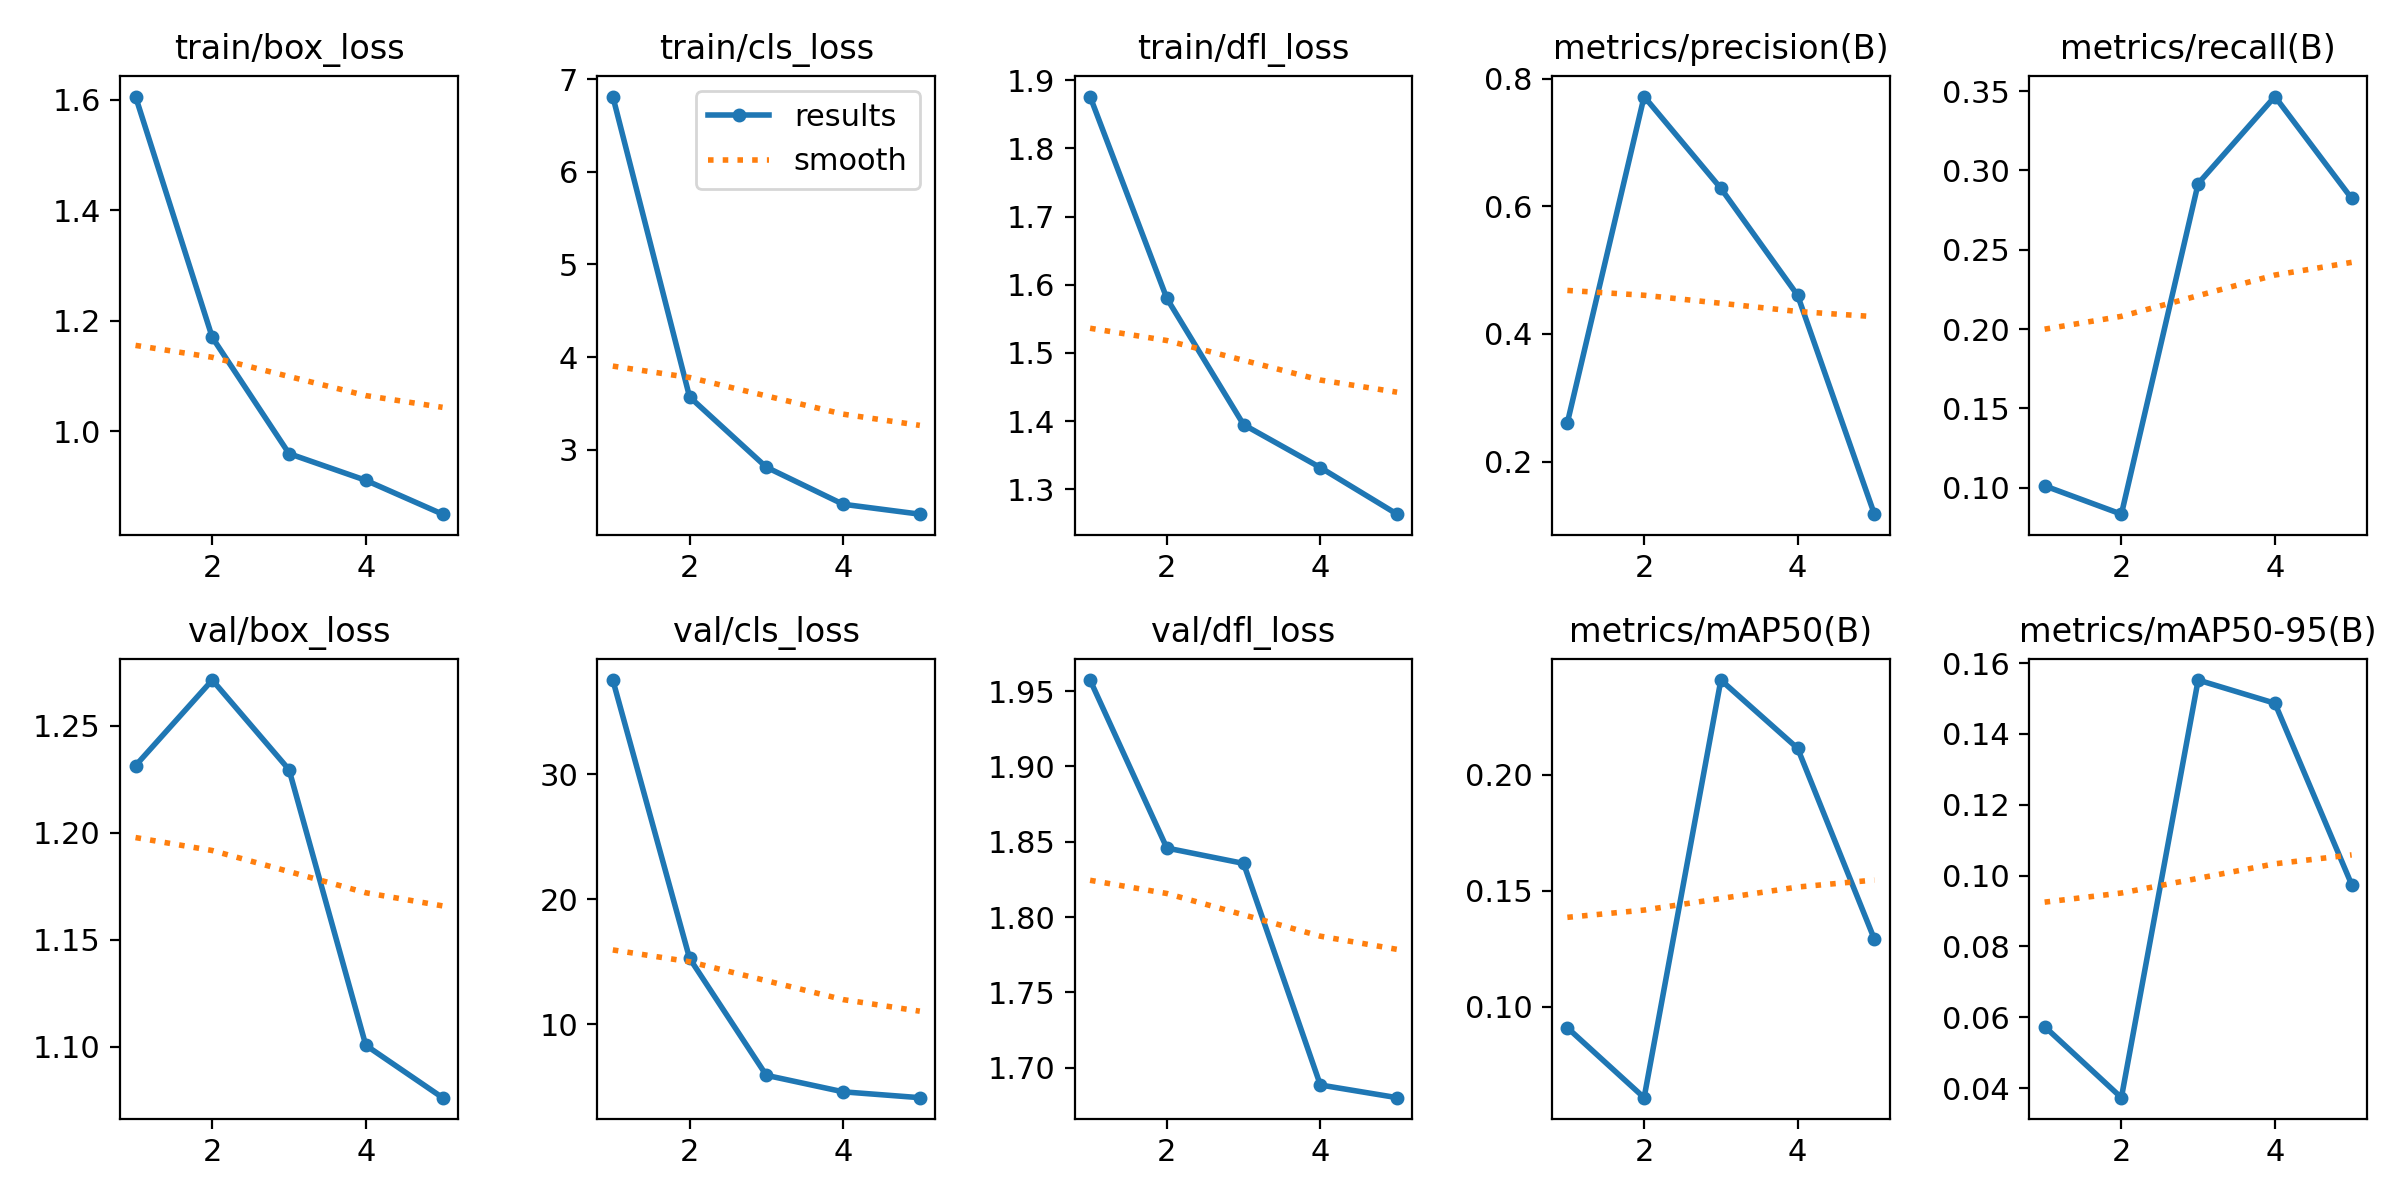

In [19]:
from IPython.display import Image, display

# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/results.png'  
# Display the PNG image
display(Image(filename=png_file_path))

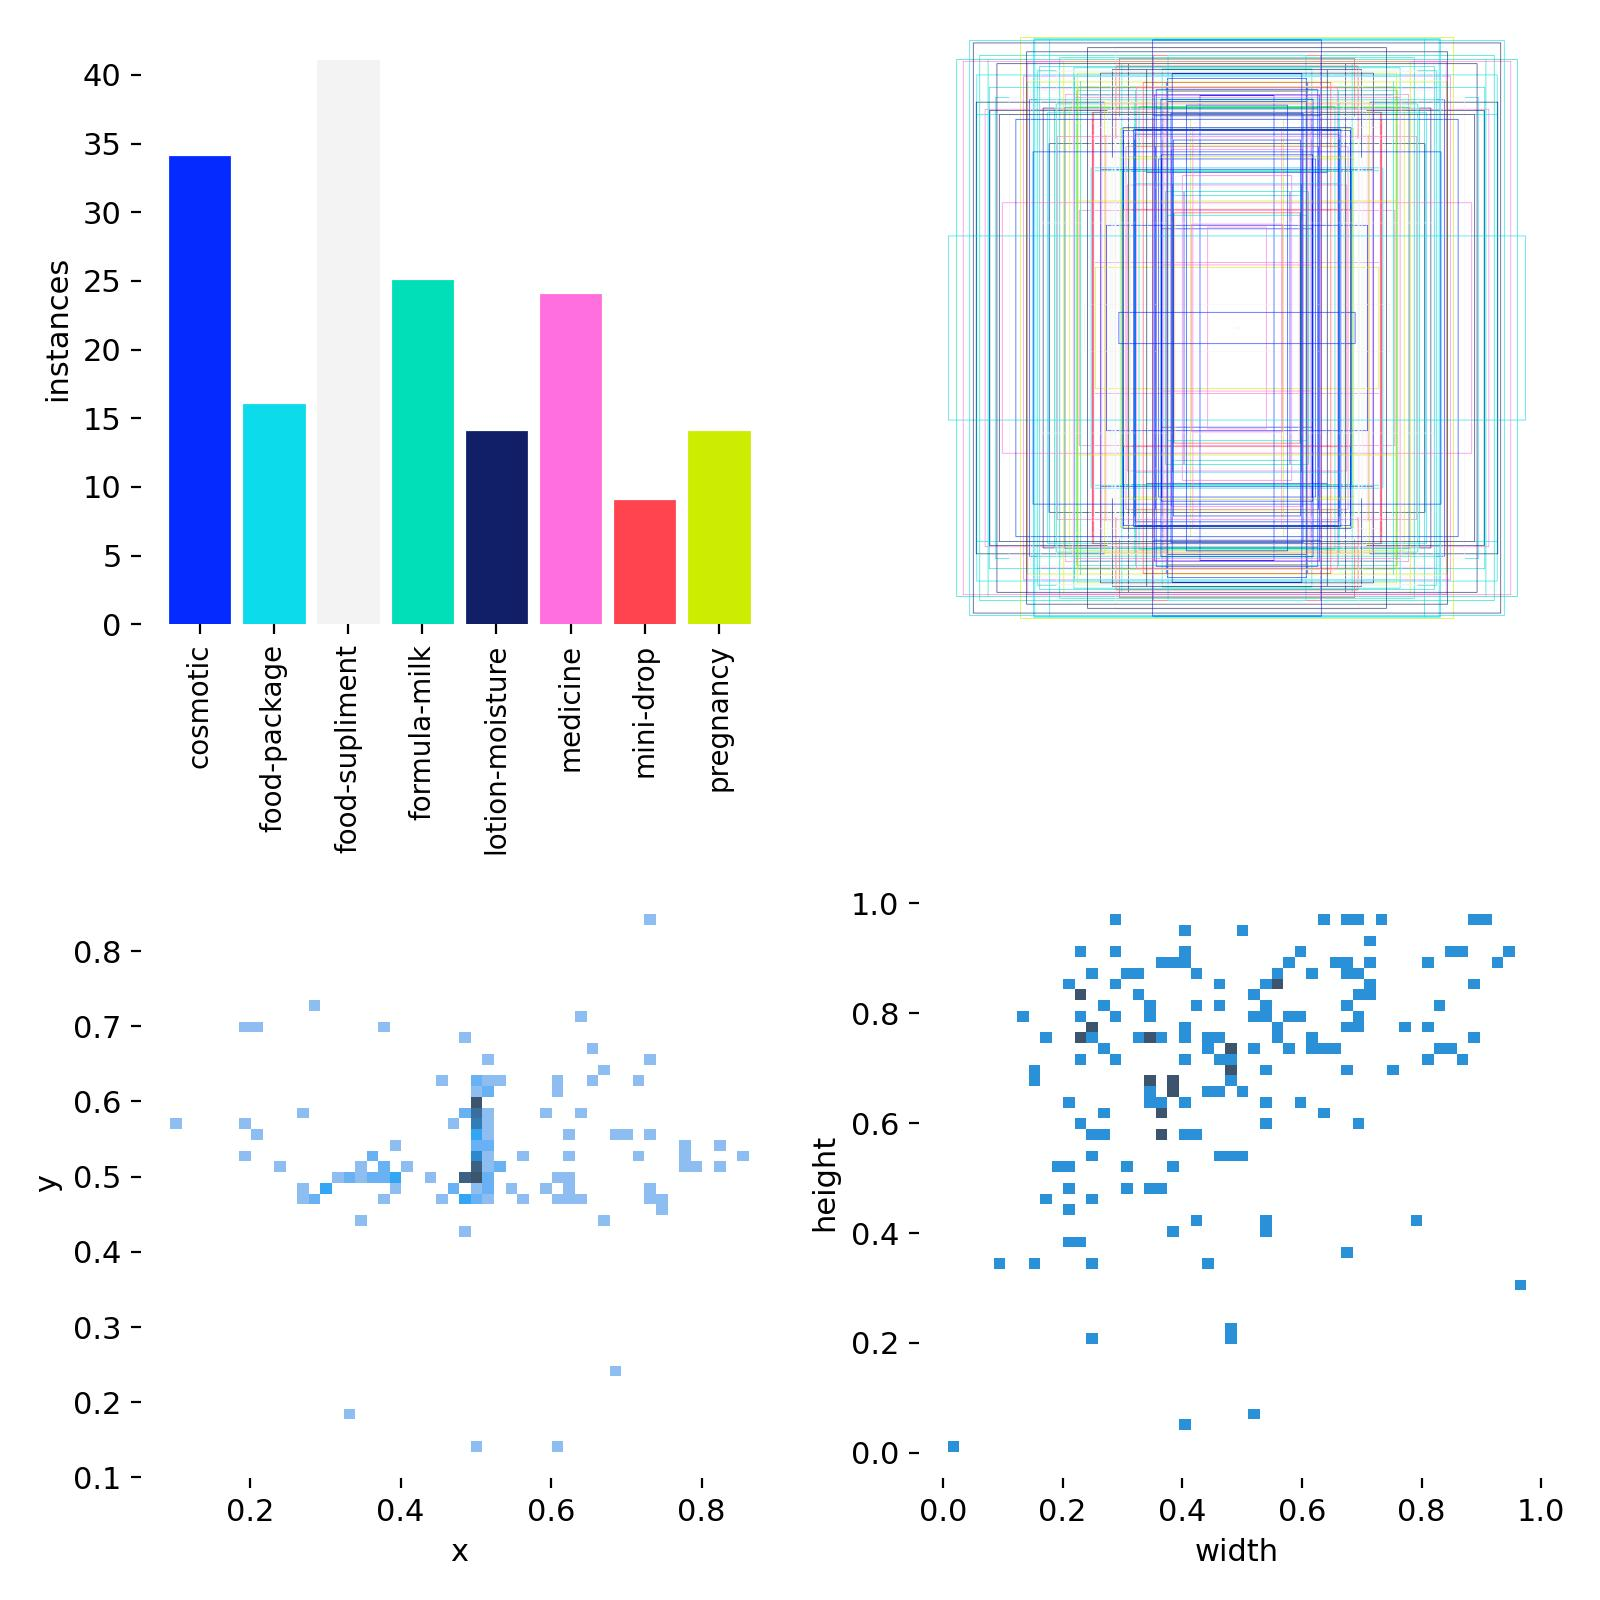

In [20]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/labels.jpg'  

# Display the PNG image
display(Image(filename=png_file_path))

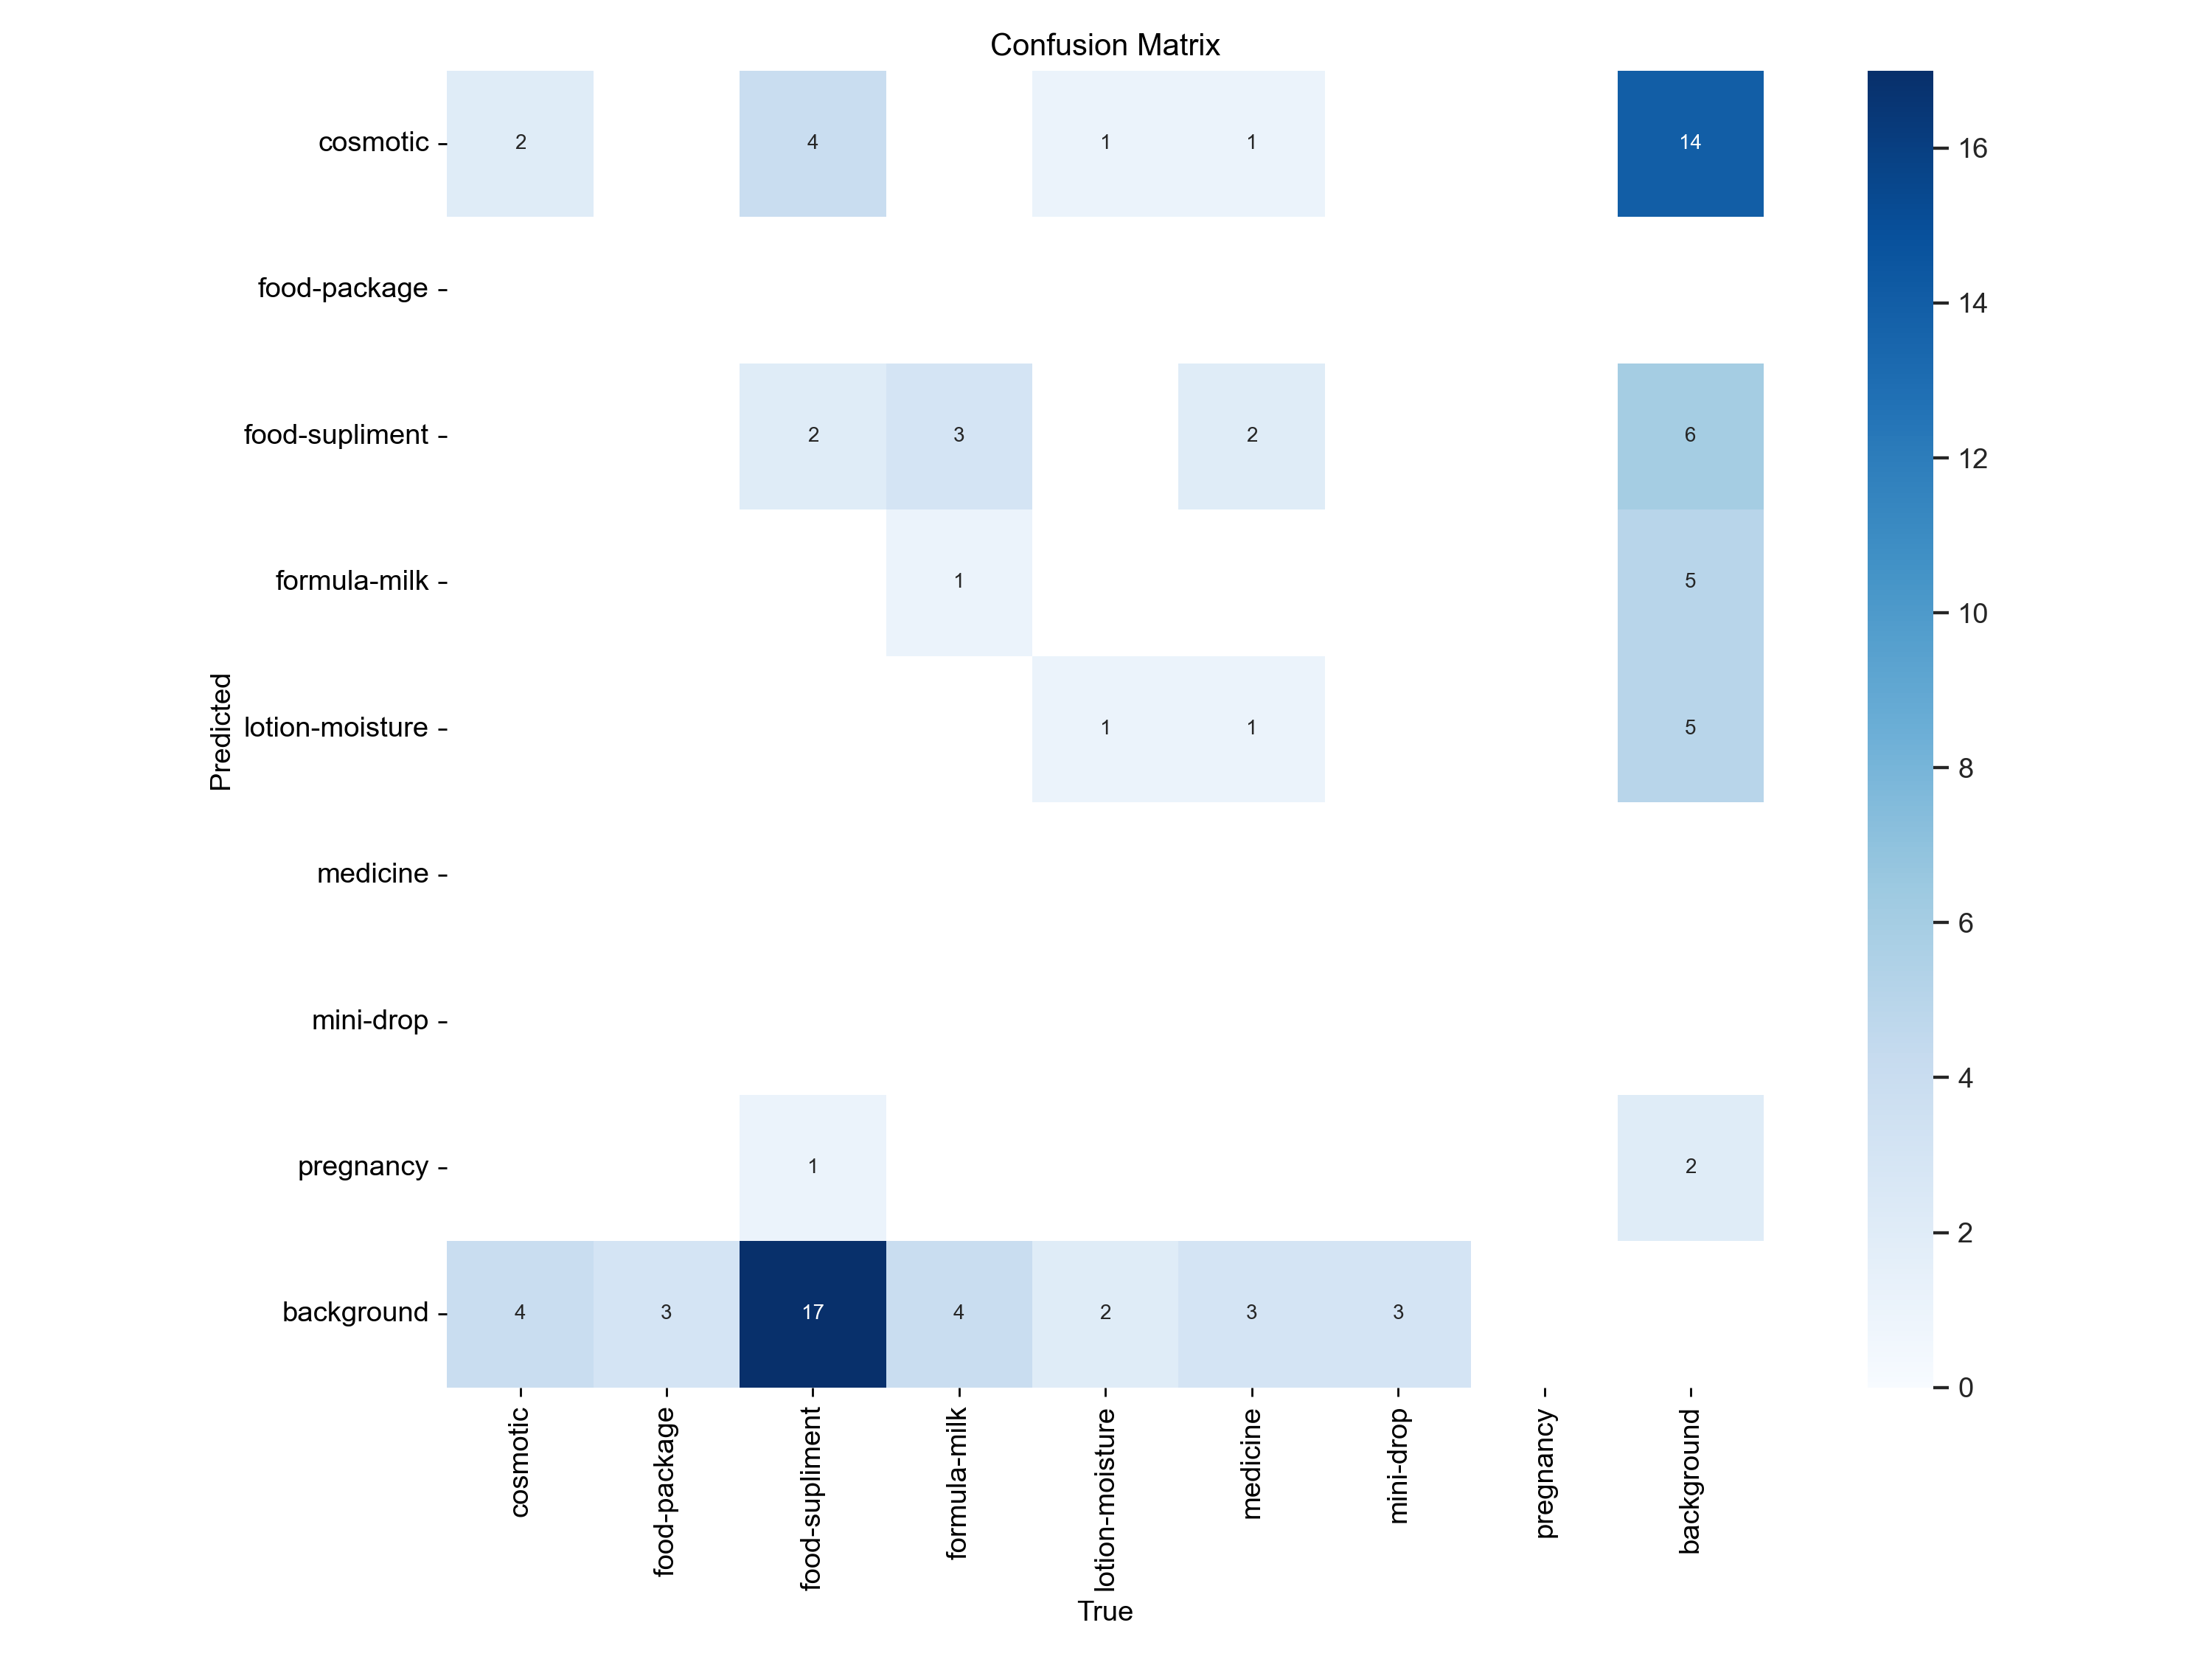

In [21]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/confusion_matrix.png' 
# Display the PNG image
display(Image(filename=png_file_path))

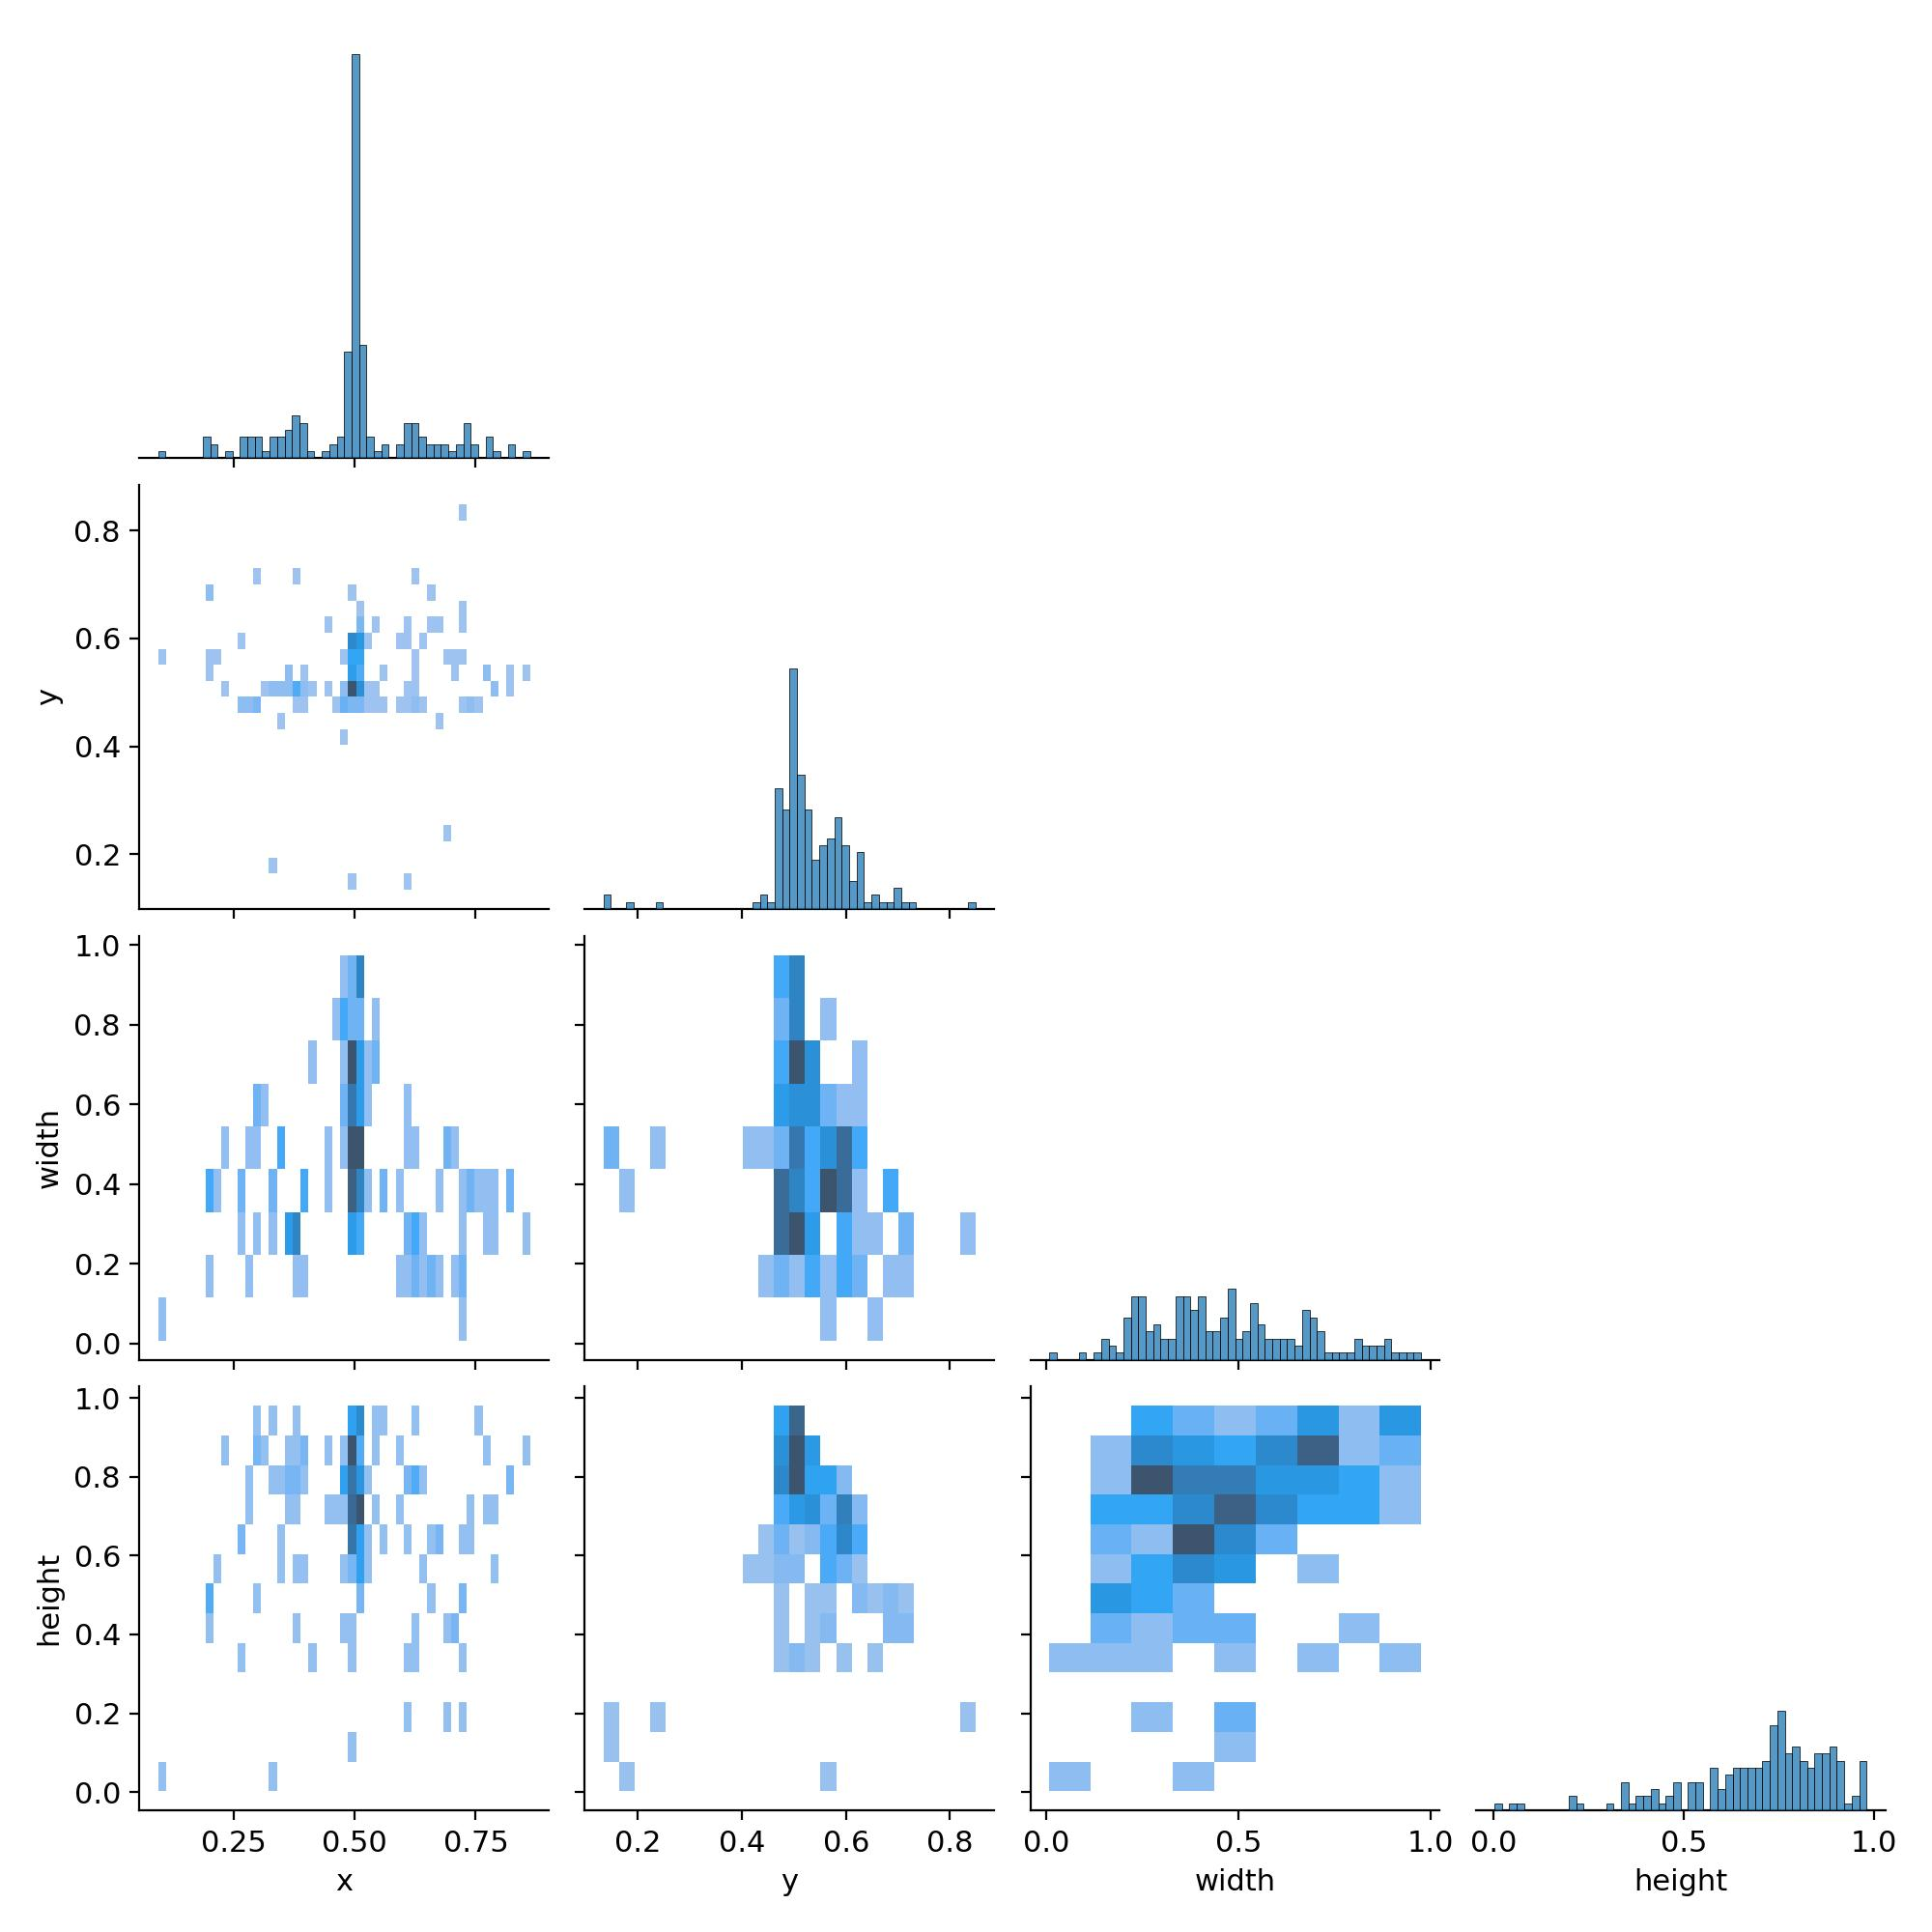

In [22]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/labels_correlogram.jpg'  
# Display the PNG image
display(Image(filename=png_file_path))

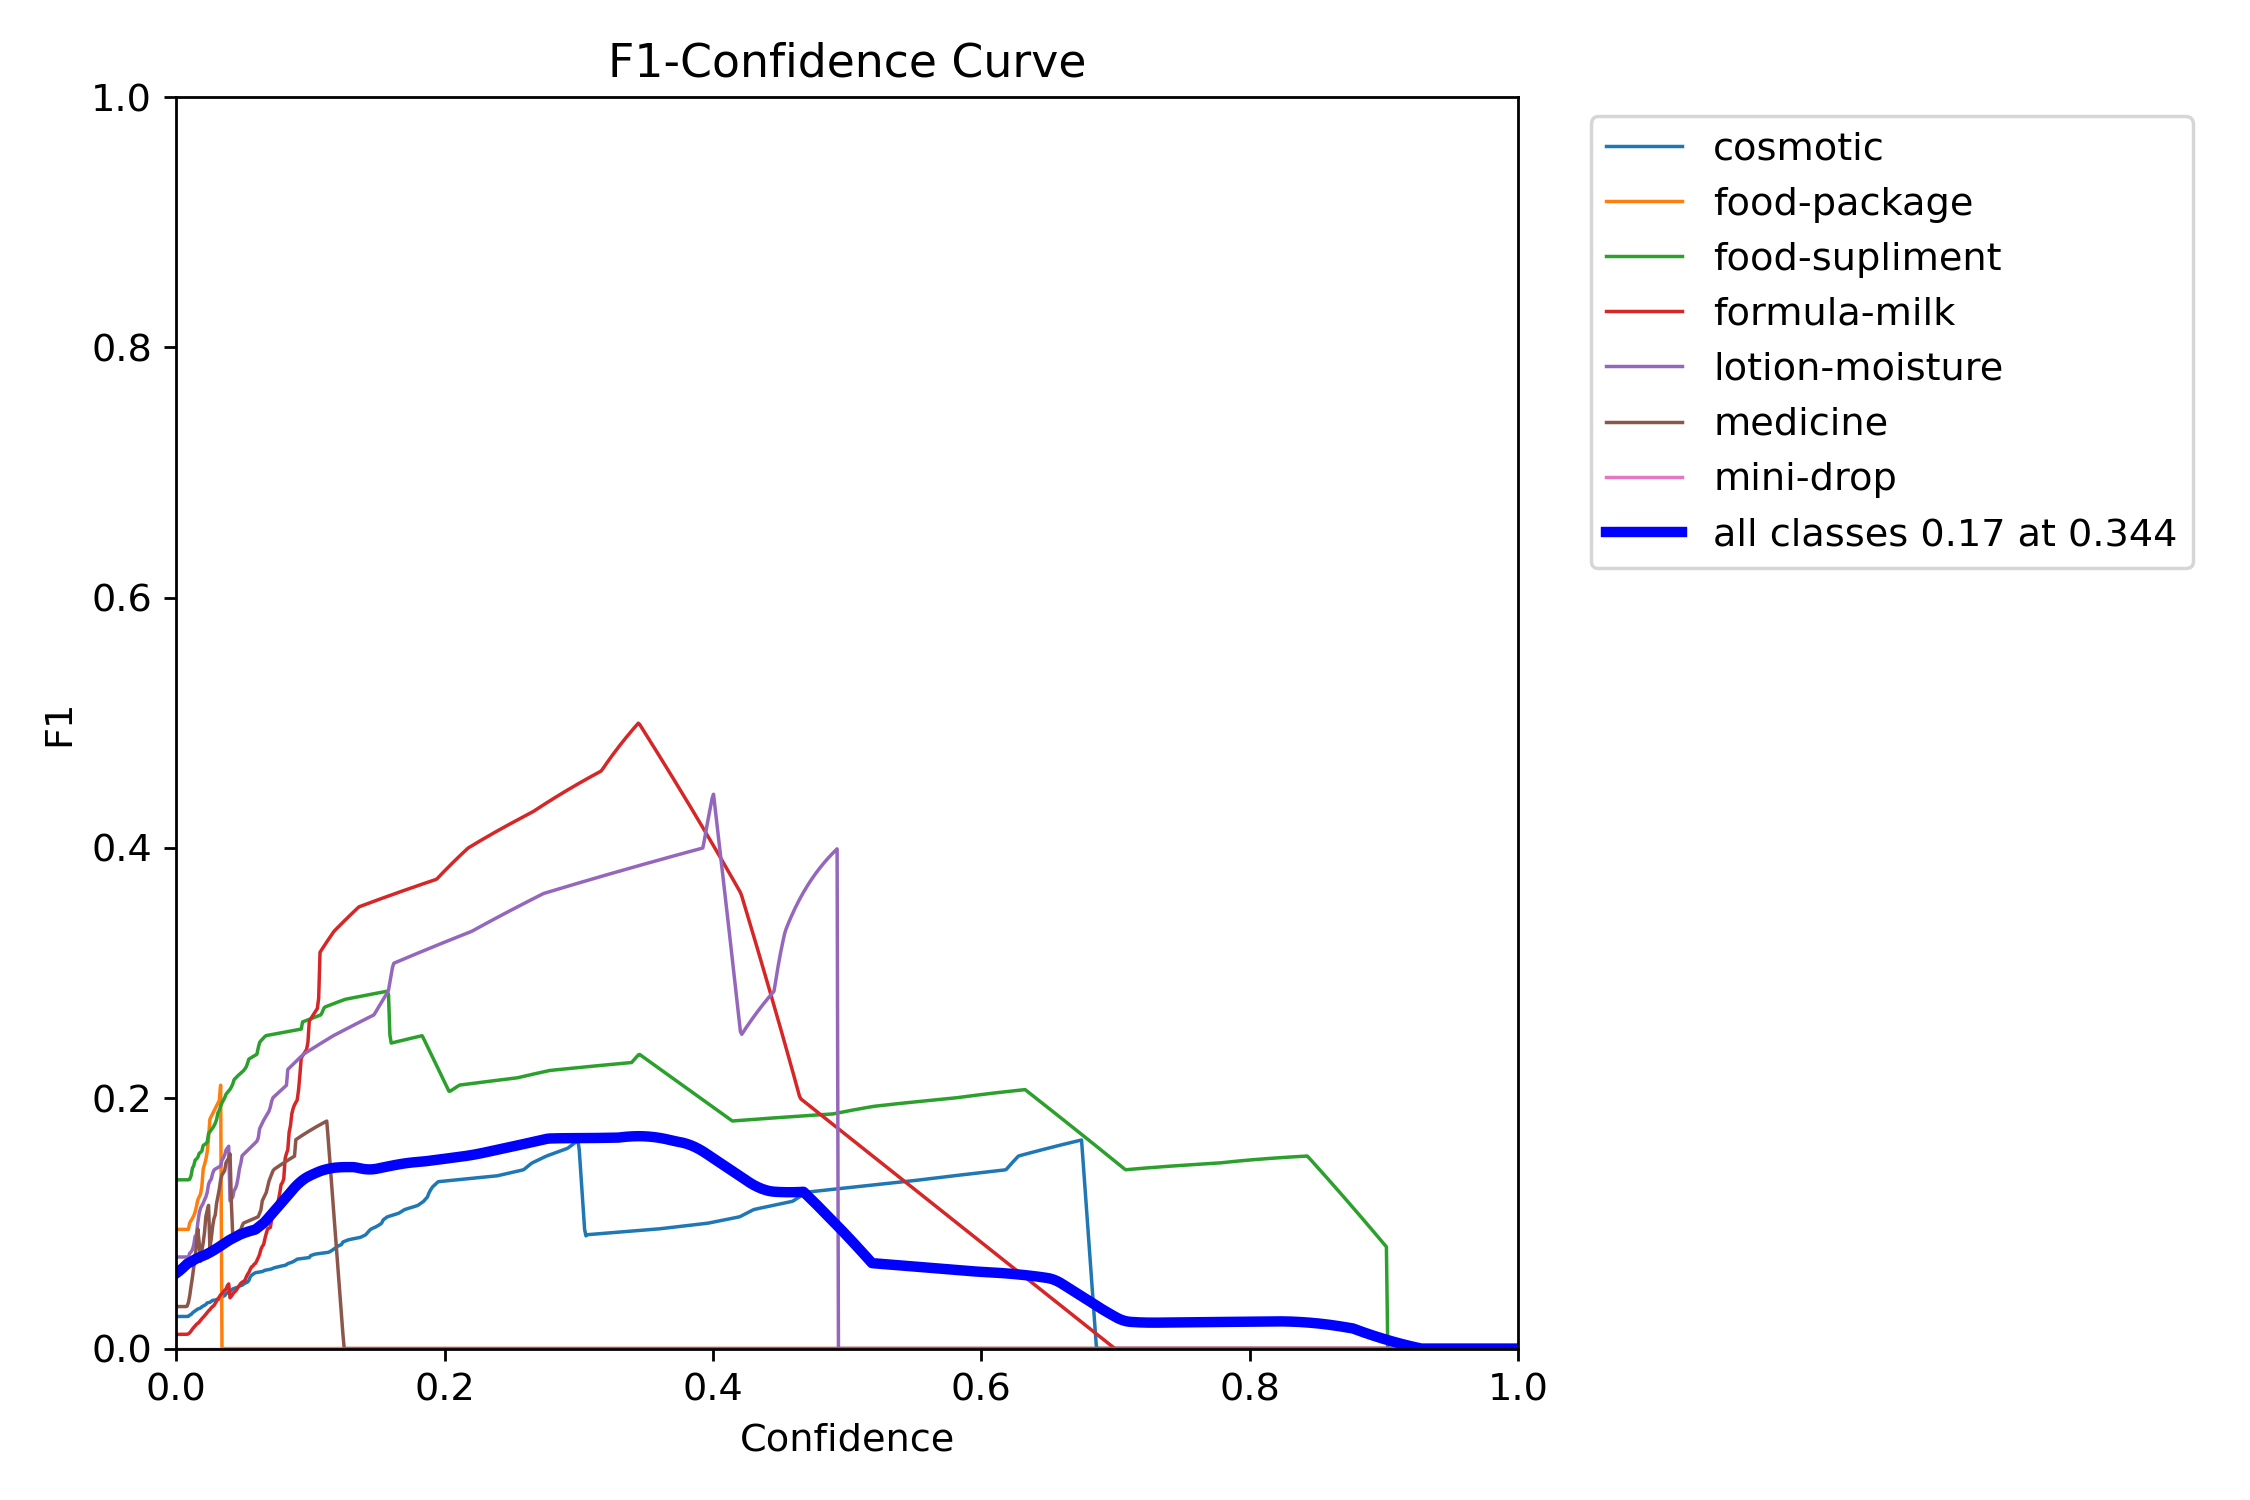

In [23]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/F1_curve.png'  

# Display the PNG image
display(Image(filename=png_file_path))

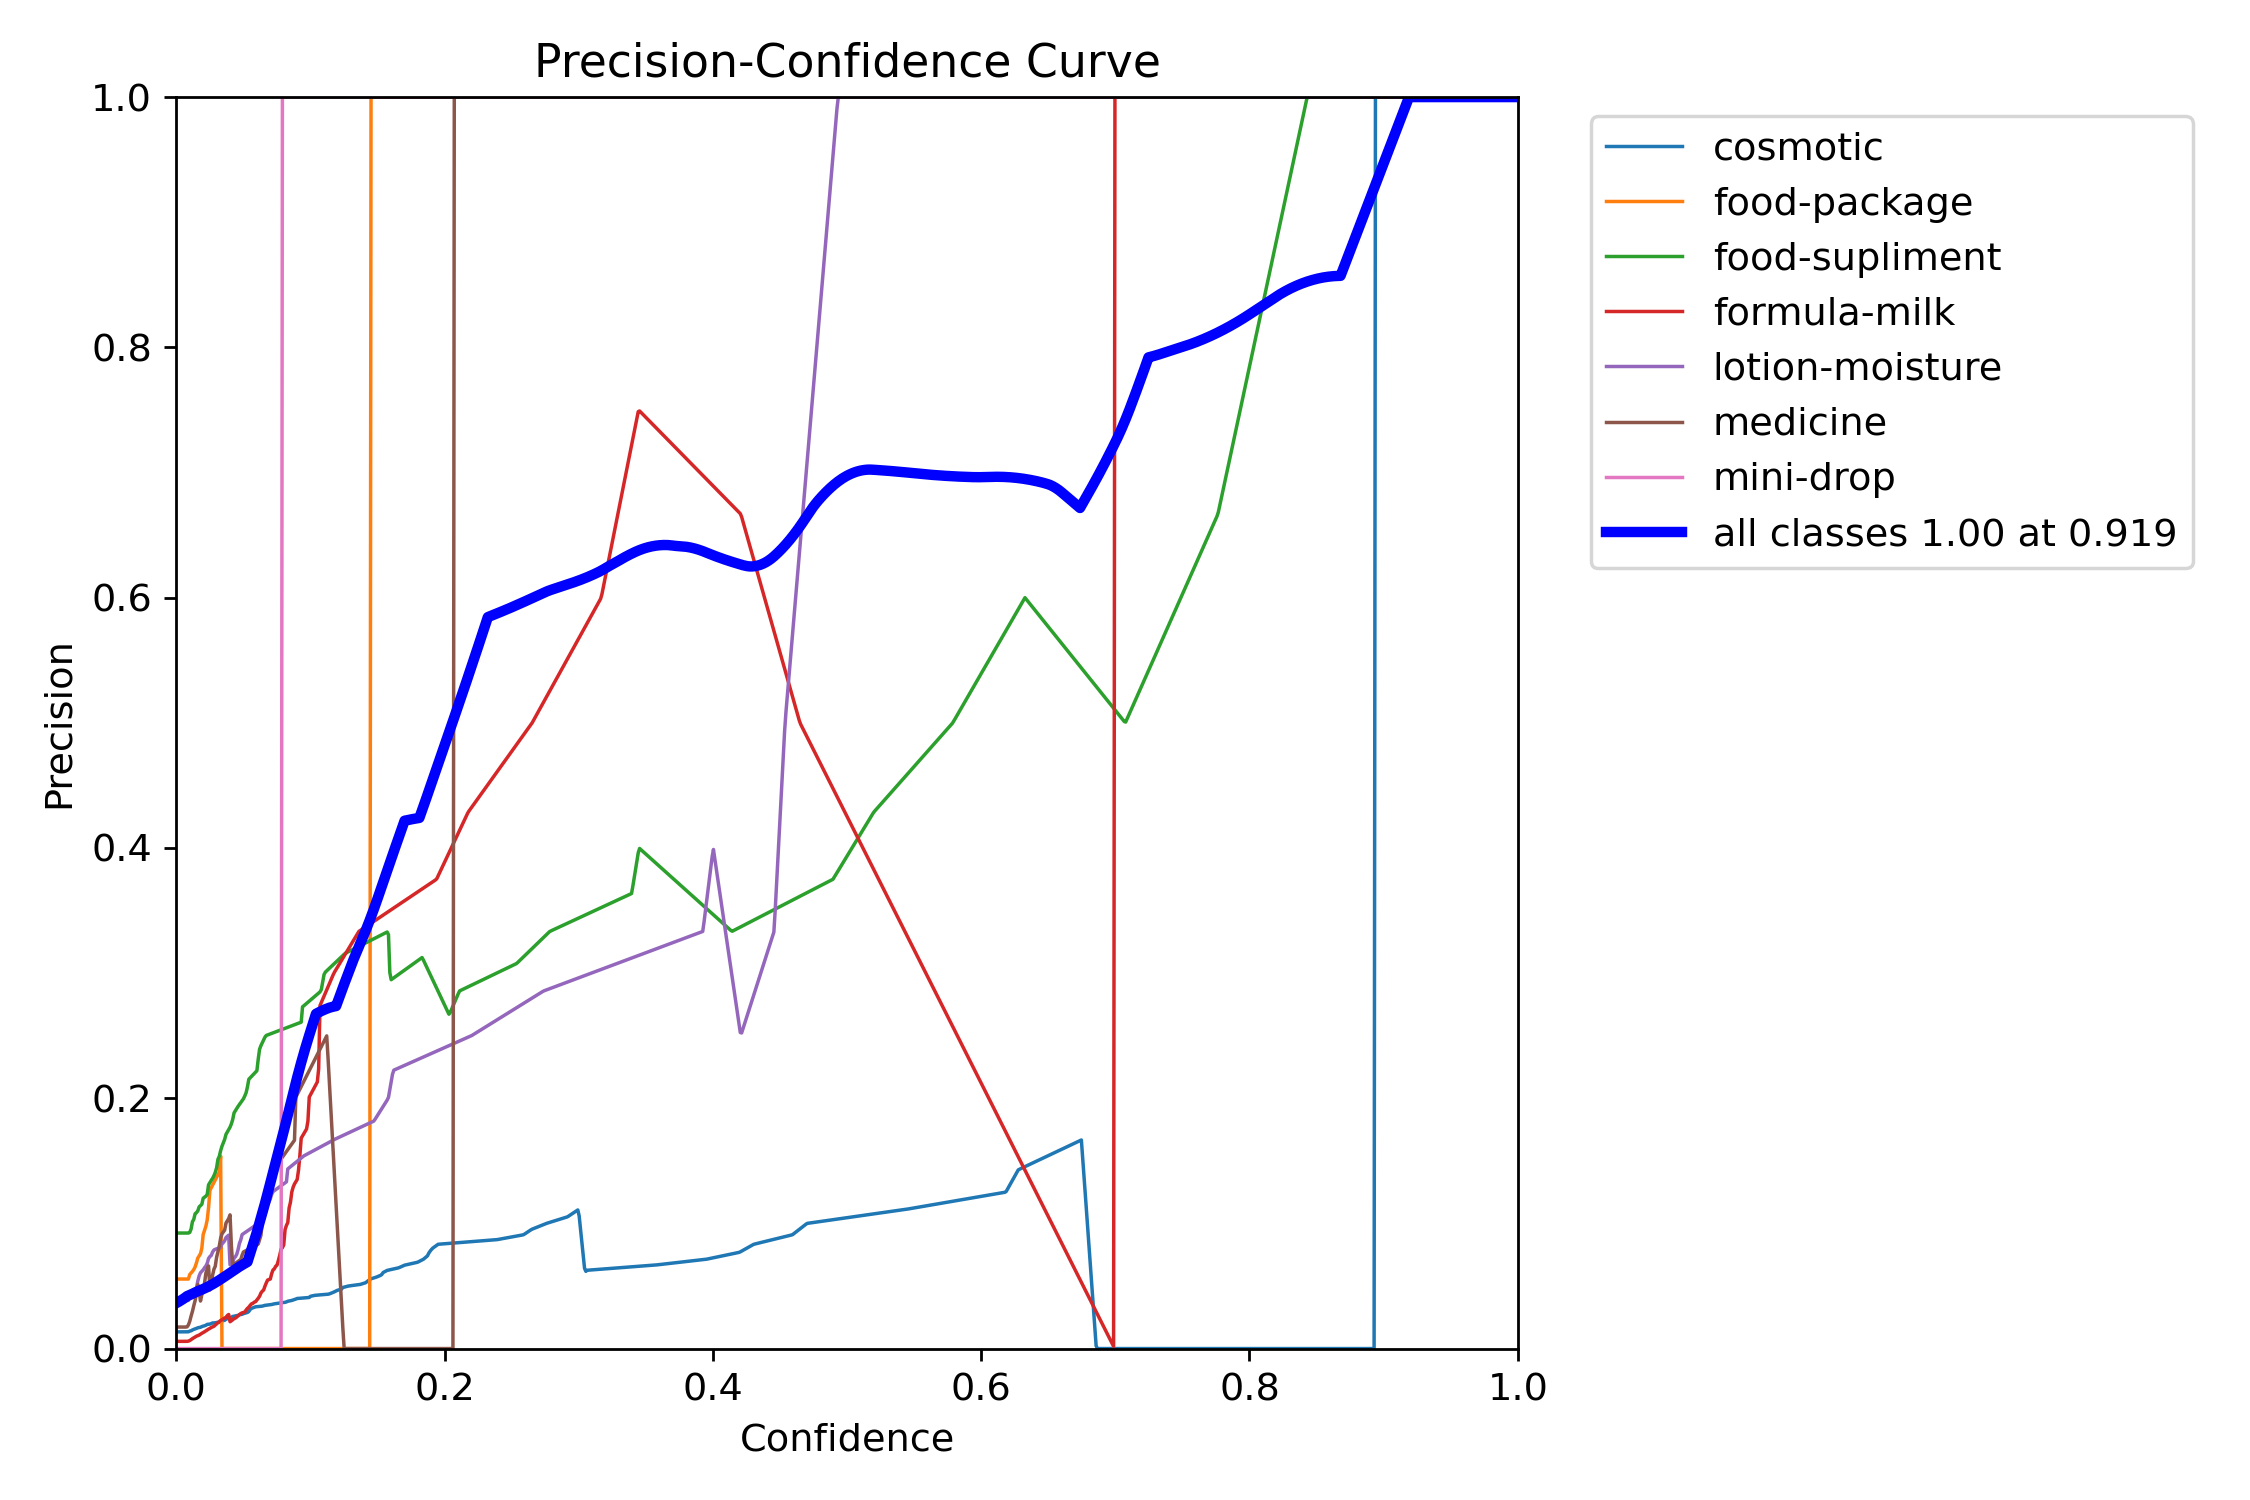

In [24]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/P_curve.png'  
# Display the PNG image
display(Image(filename=png_file_path))

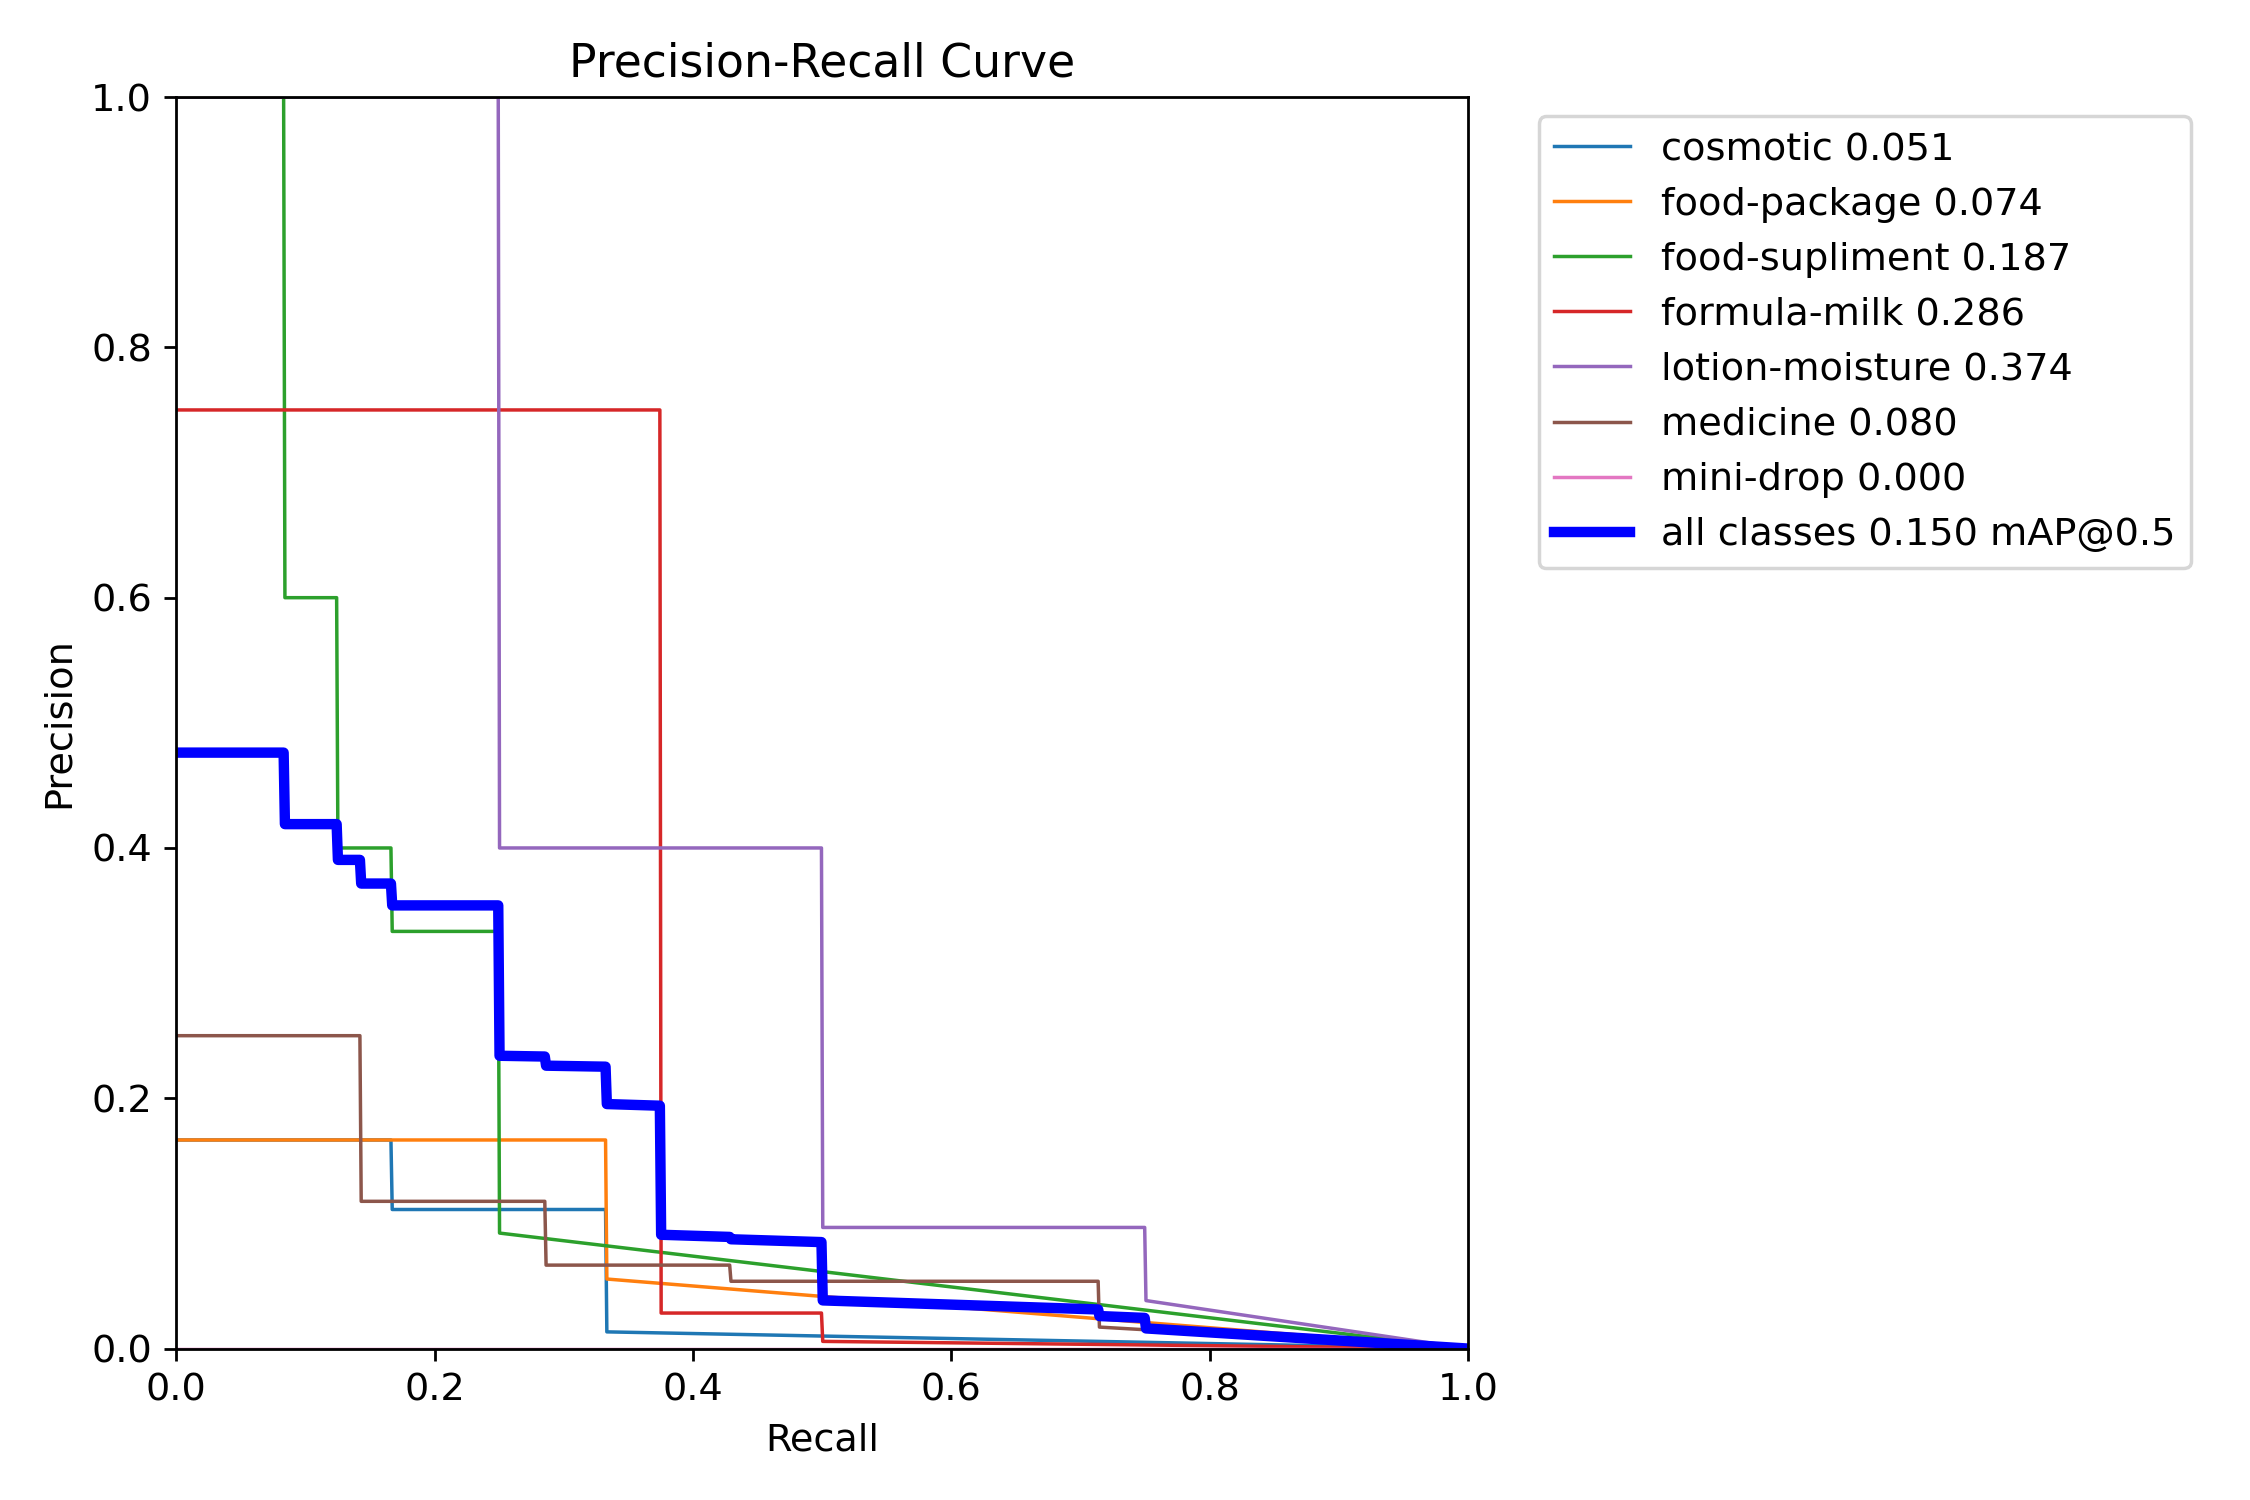

In [25]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/PR_curve.png'  

# Display the PNG image
display(Image(filename=png_file_path))

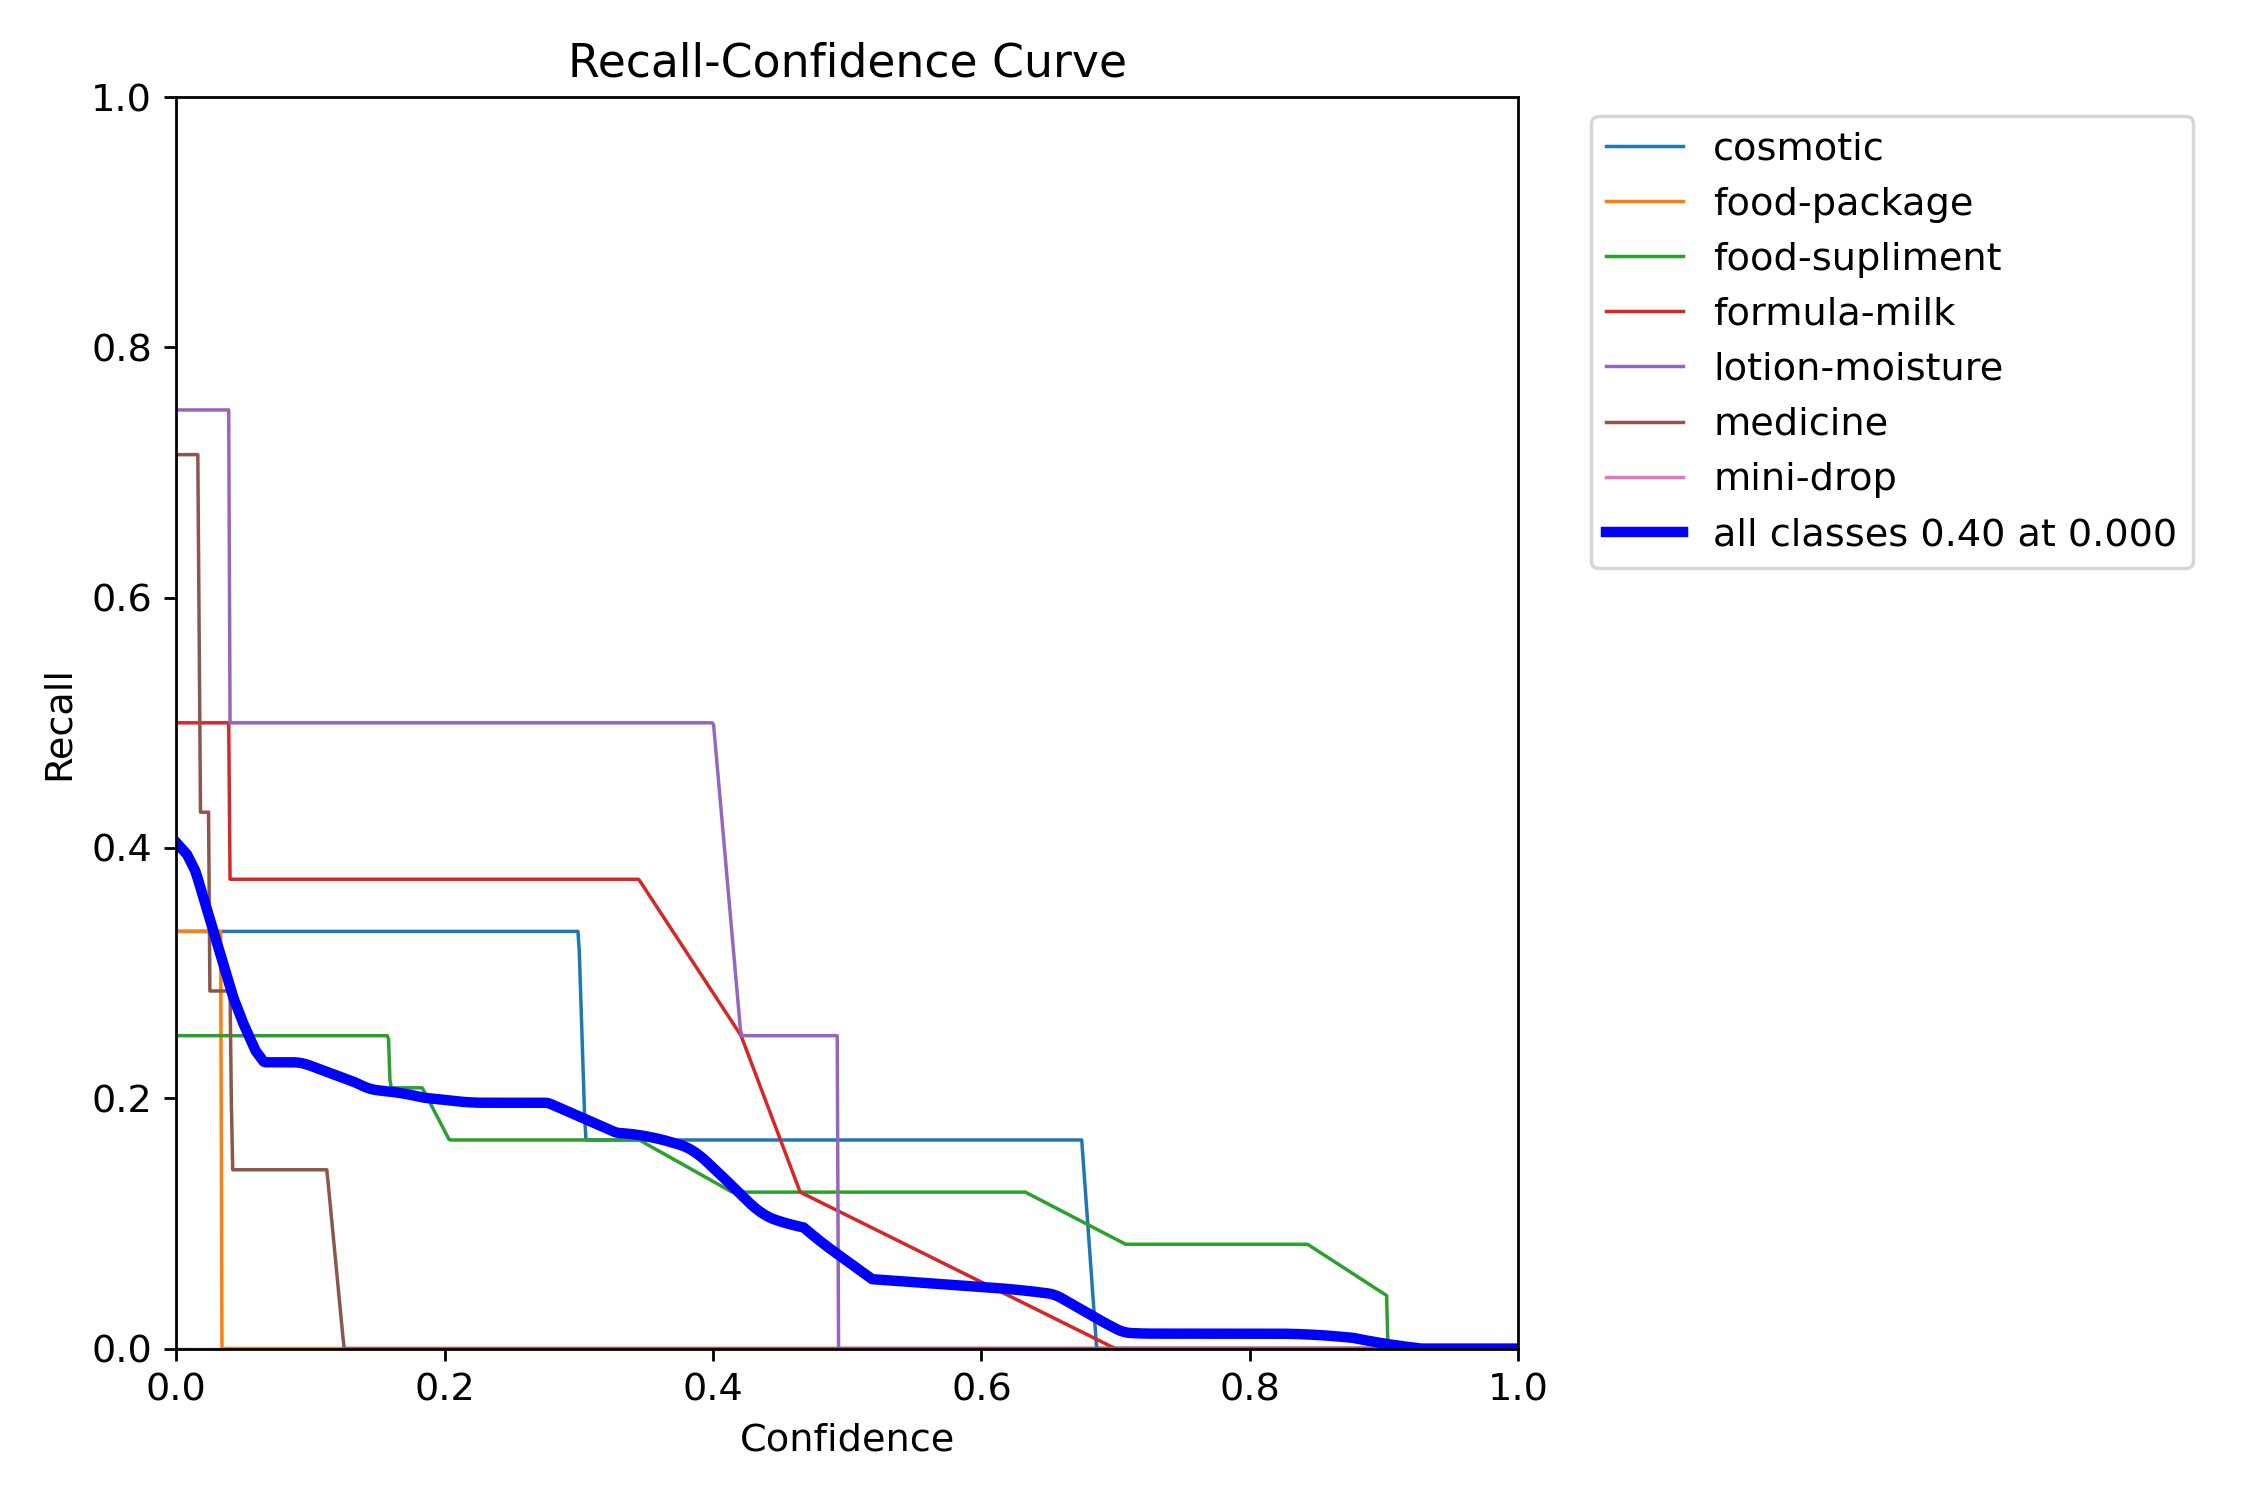

In [26]:
# Replace this with the path to your PNG results
png_file_path = 'medical-detection/fine_tuned_model/R_curve.png'  

# Display the PNG image
display(Image(filename=png_file_path))